##  Exploratory Data Analysis - Weather Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.pandas.set_option("display.max_columns", None, "display.max_rows", None)

In [2]:
df = pd.read_csv('SriLanka_Weather_Dataset_New.csv')

In [3]:
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,1/1/2010,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,20.92,0.0,0.0,0,0,11.7,27.4,20,4.58,7.0,79.899994,16,Sri Lanka,Colombo
1,1/2/2010,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,17.71,0.1,0.1,0,1,13.0,27.0,24,3.84,7.0,79.899994,16,Sri Lanka,Colombo
2,1/3/2010,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,17.76,0.6,0.6,0,3,12.3,27.4,16,3.65,7.0,79.899994,16,Sri Lanka,Colombo
3,1/4/2010,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,16.50,0.0,0.0,0,0,17.0,34.6,356,3.79,7.0,79.899994,16,Sri Lanka,Colombo
4,1/5/2010,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,23.61,0.0,0.0,0,0,18.7,37.1,355,4.97,7.0,79.899994,16,Sri Lanka,Colombo


In [4]:
df.shape

(147480, 24)

In [5]:
df.dtypes

time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                    int64
precipitation_hours             int64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                       int64
country                        object
city                           object
dtype: object

In [6]:
import folium
import pandas as pd

# Load the dataset
df = pd.read_csv("SriLanka_Weather_Dataset.csv")

# Extract unique city data along with their latitude and longitude values
city_data = df.drop_duplicates(subset=["city", "latitude", "longitude"])[["city", "latitude", "longitude"]]

# Create a map
m = folium.Map(location=[7.877083, 80.697917], tiles='CartoDB positron', zoom_start=7, control_scale=True)

# Add cities as circles with popups
for idx, row in city_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='#2b8cbe',
        fill=True,
        fill_color='#2b8cbe',
        fill_opacity= 1,
        popup=row['city']
    ).add_to(m)

# Display the map
m


In [7]:
# Change datatypes

# Change datatype of the 'date_column' to datetime
df['time'] = pd.to_datetime(df['time'])

df['weathercode'] = df['weathercode'].astype(str)

# Print the updated DataFrame
print(df['time'].dtypes)
print(df['weathercode'].dtypes)

datetime64[ns]
object


In [8]:
categorical_features = ['weathercode', 'winddirection_10m_dominant', 'country', 'city']
numerical_features = [col for col in df.columns if col not in categorical_features]

print('categorical features : ' , categorical_features)
print('numerical features : ', numerical_features)

categorical features :  ['weathercode', 'winddirection_10m_dominant', 'country', 'city']
numerical features :  ['time', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise', 'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max', 'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation']


In [9]:
categorical_features.remove('country')

In [10]:
# Remove the value 3 from the list
numerical_features.remove('time')
numerical_features.remove('sunrise')
numerical_features.remove('sunset')
numerical_features.remove('latitude')
numerical_features.remove('longitude')
numerical_features.remove('snowfall_sum')
numerical_features.remove('apparent_temperature_max')
numerical_features.remove('apparent_temperature_min')
numerical_features.remove('apparent_temperature_mean')
numerical_features.remove('precipitation_sum')
numerical_features.remove('elevation')
# numerical_features.remove('apparent_temperature_max')
# numerical_features.remove('apparent_temperature_max')

print(numerical_features)

['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'shortwave_radiation_sum', 'rain_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max', 'et0_fao_evapotranspiration']


In [11]:
for feature in categorical_features:
  print(feature)
  print(df[feature].value_counts())

weathercode
weathercode
51    37559
63    27477
61    22690
53    22308
2     10388
1      9438
55     7794
3      5877
65     2925
0      1024
Name: count, dtype: int64
winddirection_10m_dominant
winddirection_10m_dominant
218    1463
220    1415
216    1398
223    1381
215    1381
214    1377
217    1375
221    1358
224    1346
213    1343
219    1322
222    1272
212    1262
227    1259
211    1226
225    1216
210    1175
226    1129
208    1097
231    1039
209    1028
228    1011
238    1006
230     995
237     990
240     978
241     973
229     954
235     954
232     946
245     944
207     924
242     923
234     921
262     915
261     899
206     898
255     892
205     888
251     886
257     878
246     875
267     875
243     859
252     853
269     852
260     852
236     848
239     847
247     835
256     833
265     819
259     814
244     809
258     808
263     807
233     783
249     780
268     769
248     760
264     745
270     743
250     742
204     741
202     

In [12]:
df = df.drop('country', axis=1)
print(df.shape)

(147480, 23)


In [13]:
df[numerical_features].describe()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,shortwave_radiation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,et0_fao_evapotranspiration
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,29.242367,23.899913,26.225590,18.483513,5.975637,8.762524,15.561288,34.796932,3.896143
std,2.120345,2.059291,1.842147,4.214270,10.215294,7.191010,6.213737,10.214372,1.023126
min,17.500000,12.100000,16.300000,1.230000,0.000000,0.000000,2.200000,11.500000,0.420000
25%,28.200000,23.100000,25.600000,16.220000,0.400000,2.000000,11.000000,26.600000,3.260000
50%,29.200000,24.300000,26.400000,19.130000,2.600000,8.000000,15.000000,33.100000,3.890000
75%,30.400000,25.200000,27.200000,21.510000,7.500000,14.000000,18.900000,41.800000,4.550000
max,37.500000,30.000000,31.800000,28.980000,338.800000,24.000000,50.200000,91.800000,8.140000


In [14]:
variables_to_drop = ['snowfall_sum','precipitation_sum','sunrise','sunset','latitude','longitude','elevation','apparent_temperature_max','apparent_temperature_min','apparent_temperature_mean']
df = df.drop(variables_to_drop, axis=1)
print(df.shape)

(147480, 13)


In [15]:
df.isna().sum()

time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
shortwave_radiation_sum       0
rain_sum                      0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
city                          0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.dtypes

time                          datetime64[ns]
weathercode                           object
temperature_2m_max                   float64
temperature_2m_min                   float64
temperature_2m_mean                  float64
shortwave_radiation_sum              float64
rain_sum                             float64
precipitation_hours                  float64
windspeed_10m_max                    float64
windgusts_10m_max                    float64
winddirection_10m_dominant             int64
et0_fao_evapotranspiration           float64
city                                  object
dtype: object

In [18]:
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,shortwave_radiation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,city
0,2010-01-01,2,30.0,22.7,26.1,20.92,0.0,0.0,11.7,27.4,20,4.58,Colombo
1,2010-01-02,51,29.9,23.5,26.2,17.71,0.1,1.0,13.0,27.0,24,3.84,Colombo
2,2010-01-03,51,29.5,23.2,26.0,17.76,0.6,3.0,12.3,27.4,16,3.65,Colombo
3,2010-01-04,2,28.9,21.9,25.3,16.50,0.0,0.0,17.0,34.6,356,3.79,Colombo
4,2010-01-05,1,28.1,21.3,24.5,23.61,0.0,0.0,18.7,37.1,355,4.97,Colombo


## EDA

In [19]:
df['weathercode'].value_counts()

weathercode
51    37559
63    27477
61    22690
53    22308
2     10388
1      9438
55     7794
3      5877
65     2925
0      1024
Name: count, dtype: int64

In [20]:
df['weathercode'].value_counts()/len(df)*100

weathercode
51    25.467182
63    18.631001
61    15.385137
53    15.126119
2      7.043667
1      6.399512
55     5.284784
3      3.984947
65     1.983320
0      0.694331
Name: count, dtype: float64

In [22]:
# Define a dictionary to map weather codes to weather groups
weather_mapping = {
    0: 'Clear_Sky',
    1: 'Mainly_Clear',
    2: 'Partly_Cloudy',
    3: 'Overcast',
    51: 'Light_Drizzle',
    53: 'Moderate_Drizzle',
    55: 'Dense_Drizzle',
    61: 'Slight_Rain',
    63: 'Moderate_Rain',
    65: 'Heavy_Rain'
}

# Convert the 'weathercode' column to integer (if needed)
df['weathercode'] = df['weathercode'].astype(int)

# Create a new 'weathergroup' column by mapping 'weathercode' using the dictionary
df['weathergroup'] = df['weathercode'].map(weather_mapping)





In [23]:
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,shortwave_radiation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,city,weathergroup
0,2010-01-01,2,30.0,22.7,26.1,20.92,0.0,0.0,11.7,27.4,20,4.58,Colombo,Partly_Cloudy
1,2010-01-02,51,29.9,23.5,26.2,17.71,0.1,1.0,13.0,27.0,24,3.84,Colombo,Light_Drizzle
2,2010-01-03,51,29.5,23.2,26.0,17.76,0.6,3.0,12.3,27.4,16,3.65,Colombo,Light_Drizzle
3,2010-01-04,2,28.9,21.9,25.3,16.50,0.0,0.0,17.0,34.6,356,3.79,Colombo,Partly_Cloudy
4,2010-01-05,1,28.1,21.3,24.5,23.61,0.0,0.0,18.7,37.1,355,4.97,Colombo,Mainly_Clear


In [24]:
df.dtypes

time                          datetime64[ns]
weathercode                            int32
temperature_2m_max                   float64
temperature_2m_min                   float64
temperature_2m_mean                  float64
shortwave_radiation_sum              float64
rain_sum                             float64
precipitation_hours                  float64
windspeed_10m_max                    float64
windgusts_10m_max                    float64
winddirection_10m_dominant             int64
et0_fao_evapotranspiration           float64
city                                  object
weathergroup                          object
dtype: object

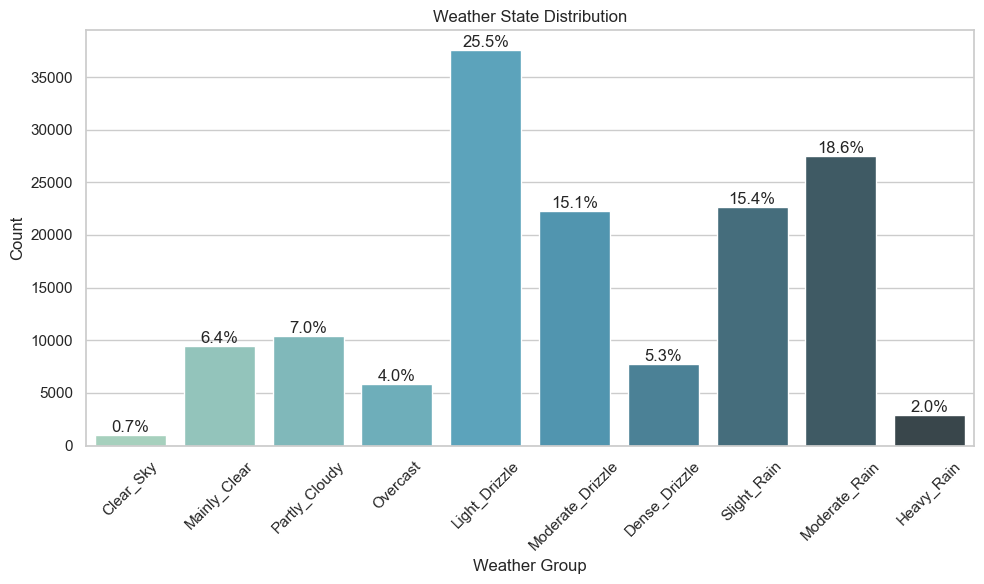

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with 10 shades of blue
custom_palette = sns.color_palette("GnBu_d", n_colors=10)

# Set Seaborn style and color palette
sns.set(style='whitegrid', palette=custom_palette)

# Define the desired order of weather groups
desired_order = [
    'Clear_Sky',
    'Mainly_Clear',
    'Partly_Cloudy',
    'Overcast',
    'Light_Drizzle',
    'Moderate_Drizzle',
    'Dense_Drizzle',
    'Slight_Rain',
    'Moderate_Rain',
    'Heavy_Rain'
]

# Group the data by 'weathergroup' and count occurrences
weathergroup_counts = df['weathergroup'].value_counts()

# Calculate the total number of data points
total_data_points = weathergroup_counts.sum()

# Create a bar plot using Seaborn with the desired order
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=weathergroup_counts.index, y=weathergroup_counts.values, order=desired_order)
plt.title('Weather State Distribution')
plt.xlabel('Weather Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_data_points)
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_height()
    ax.text(x_position, y_position, percentage, ha='center', va='bottom')

plt.show()


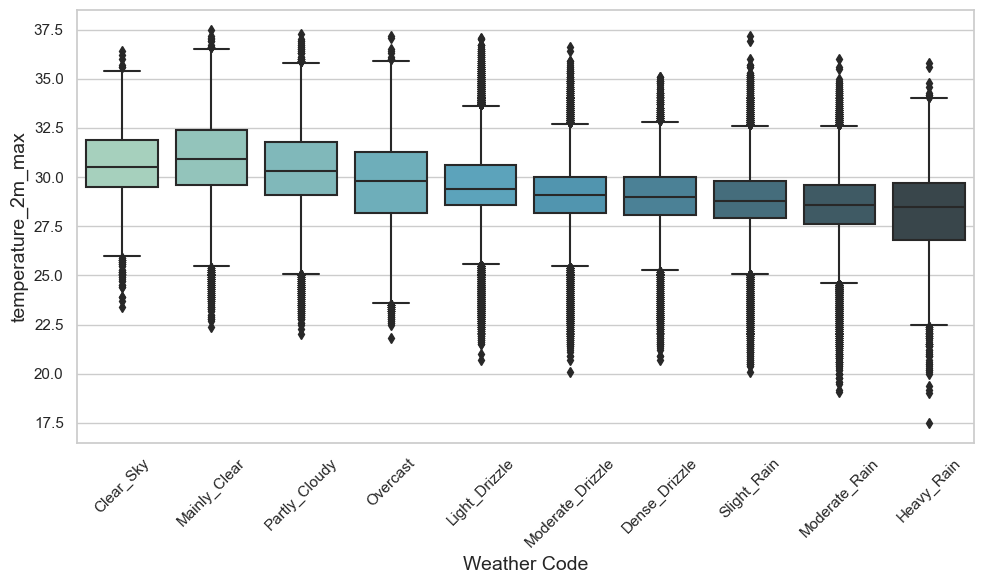

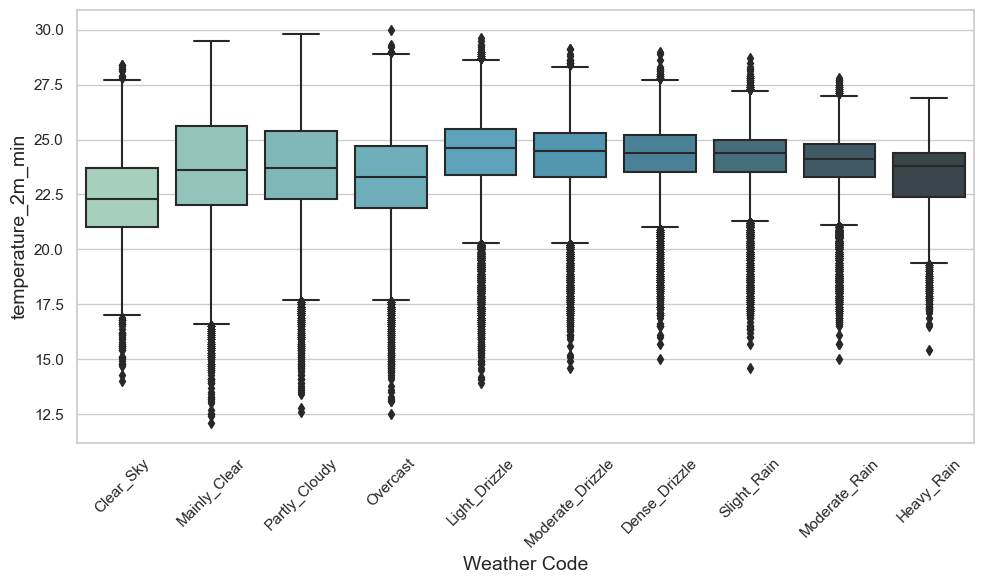

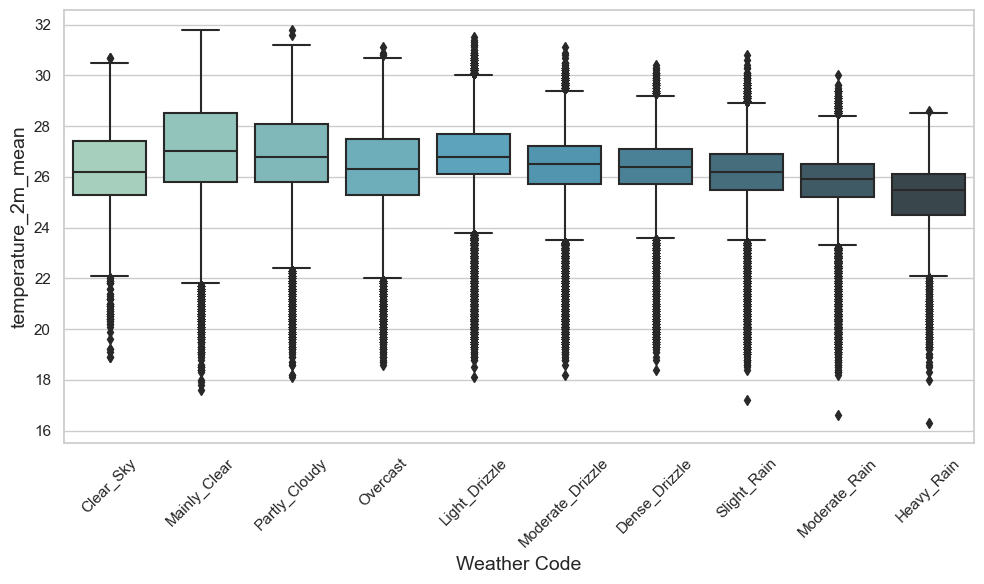

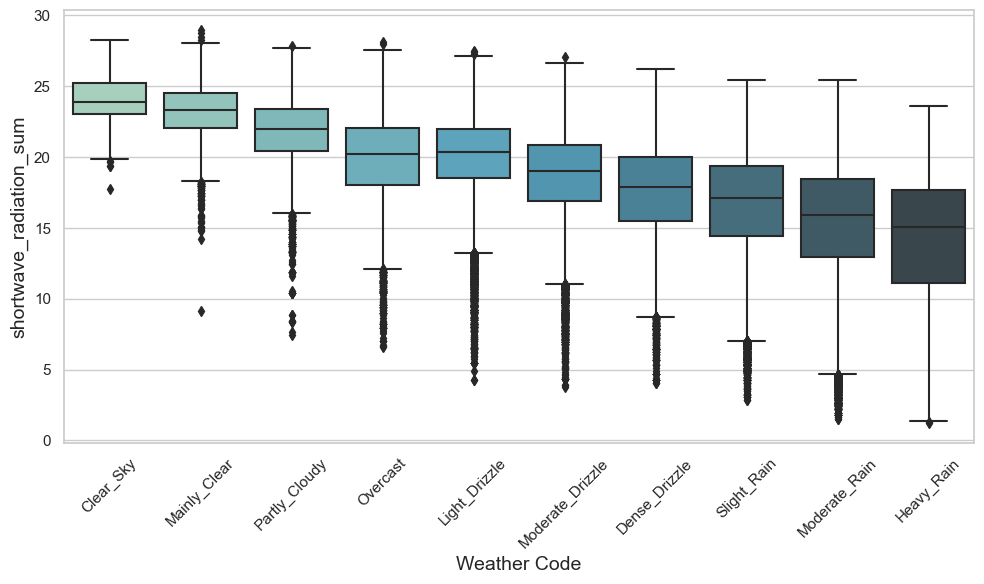

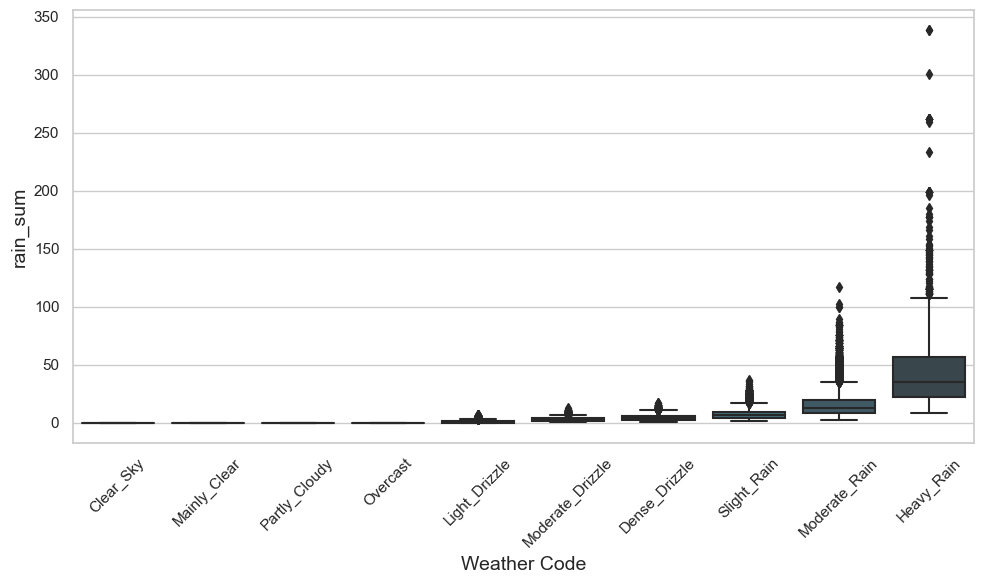

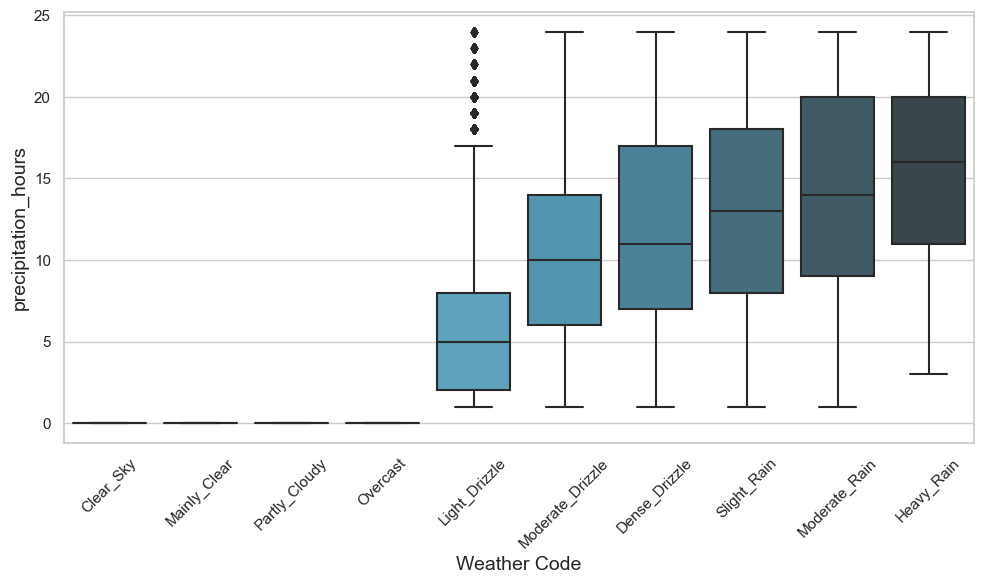

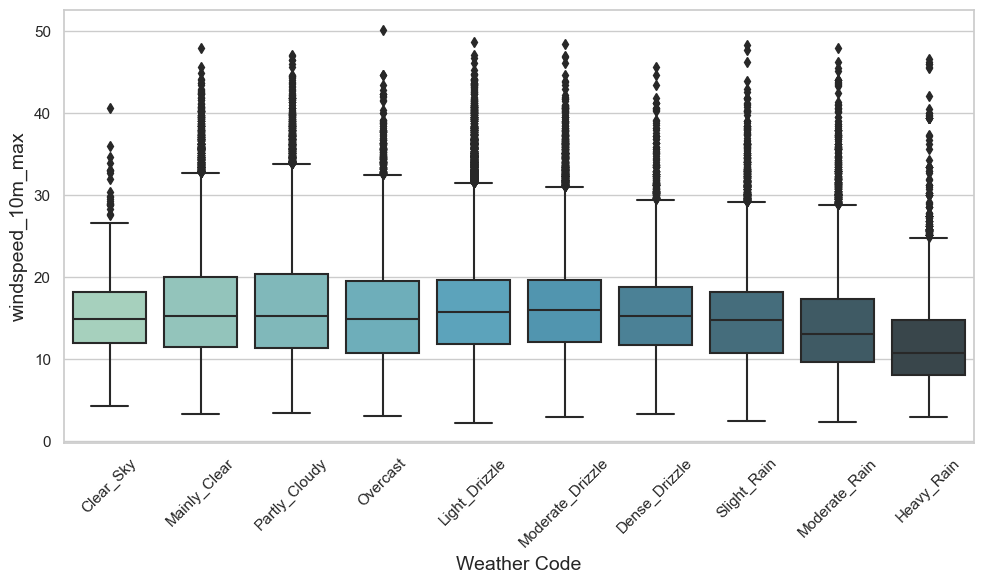

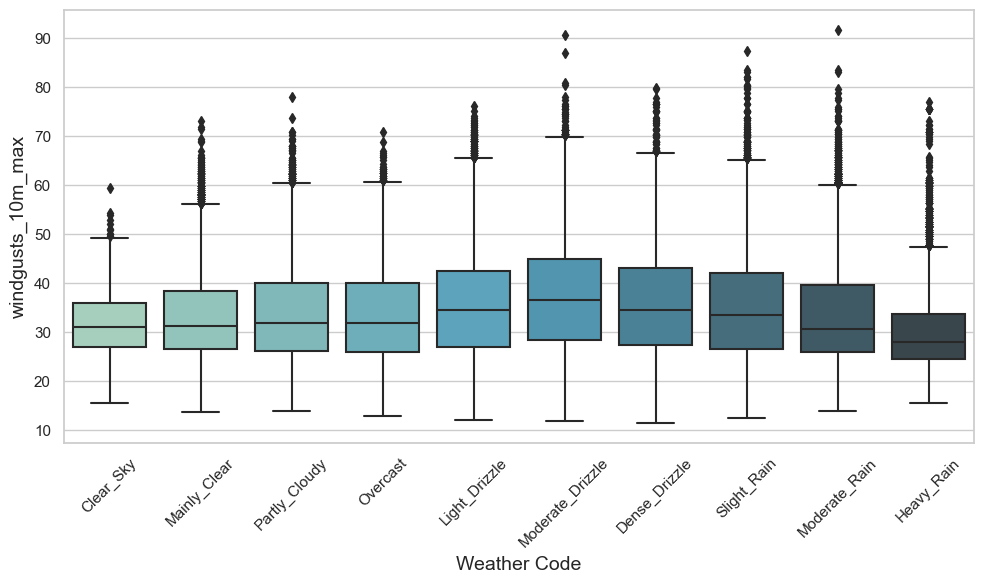

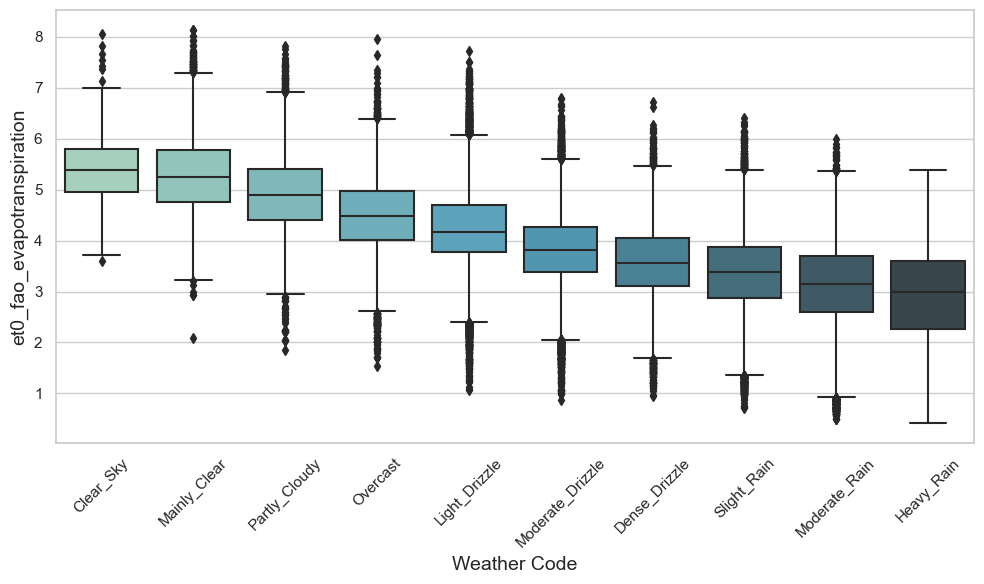

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired order of weather groups
desired_order = [
    'Clear_Sky',
    'Mainly_Clear',
    'Partly_Cloudy',
    'Overcast',
    'Light_Drizzle',
    'Moderate_Drizzle',
    'Dense_Drizzle',
    'Slight_Rain',
    'Moderate_Rain',
    'Heavy_Rain'
]

# Assuming you have defined numerical_features and df before this point

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    custom_palette = sns.color_palette("GnBu_d", n_colors=10)
    sns.boxplot(x="weathergroup", y=feature, data=df, palette= custom_palette, order=desired_order)
    plt.xlabel("Weather Code", fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


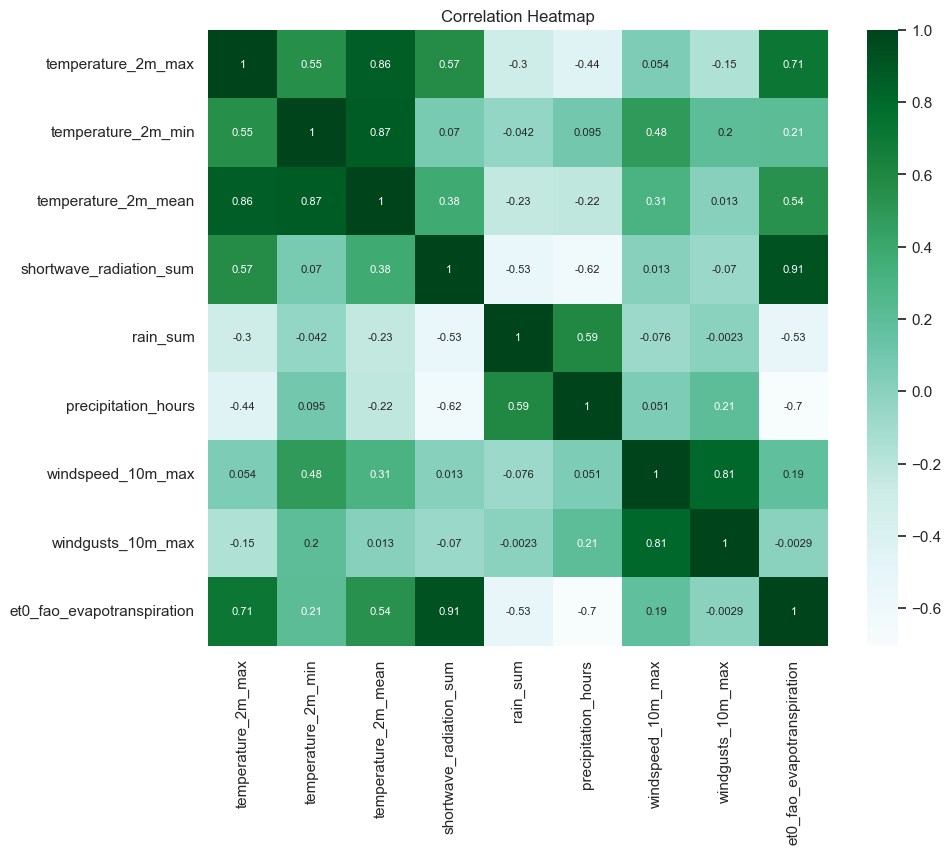

In [27]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()



<Figure size 1600x1000 with 0 Axes>

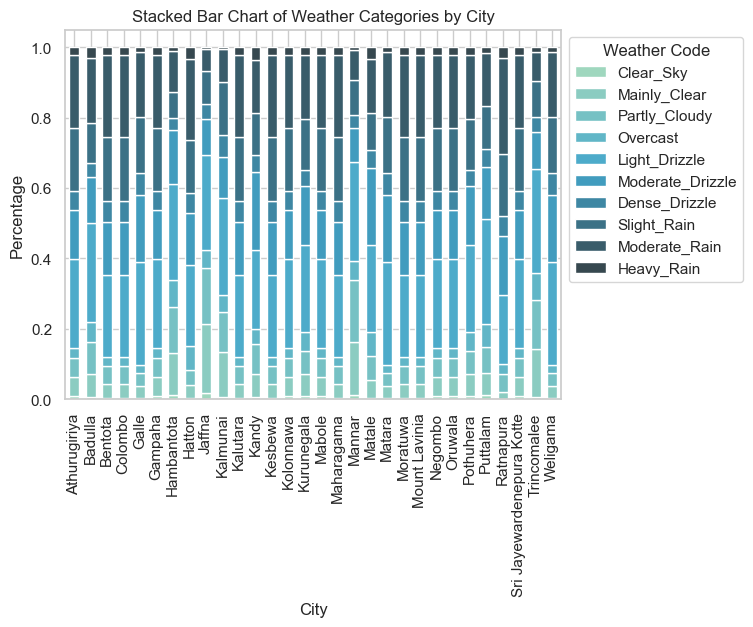

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with 10 shades of blue
custom_palette = sns.color_palette("GnBu_d", n_colors=10)

# Define the desired order of weather groups
desired_order = [
    'Clear_Sky',
    'Mainly_Clear',
    'Partly_Cloudy',
    'Overcast',
    'Light_Drizzle',
    'Moderate_Drizzle',
    'Dense_Drizzle',
    'Slight_Rain',
    'Moderate_Rain',
    'Heavy_Rain'
]

# Grouped data and normalize
grouped_data = df.groupby('city')['weathergroup'].value_counts(normalize=True).unstack()

# Reorder columns to match desired order
grouped_data = grouped_data[desired_order]

plt.figure(figsize=(16, 10))  # Increase the figure size
ax = grouped_data.plot(kind='bar', stacked=True, color=custom_palette, width = 0.6)

plt.ylabel('Percentage')  # Set the x-axis label
plt.xlabel('City')  # Set the y-axis label
plt.title('Stacked Bar Chart of Weather Categories by City')  # Set the title of the graph

# Adjust the placement of the legend
ax.legend(title='Weather Code', bbox_to_anchor=(1, 1), loc='upper left')

# plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the graph


In [29]:
# Convert 'time' column to datetime format (if not already)
df['time'] = pd.to_datetime(df['time'])

# Extract month and year into new columns
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [30]:
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,shortwave_radiation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,city,weathergroup,month,year
0,2010-01-01,2,30.0,22.7,26.1,20.92,0.0,0.0,11.7,27.4,20,4.58,Colombo,Partly_Cloudy,1,2010
1,2010-01-02,51,29.9,23.5,26.2,17.71,0.1,1.0,13.0,27.0,24,3.84,Colombo,Light_Drizzle,1,2010
2,2010-01-03,51,29.5,23.2,26.0,17.76,0.6,3.0,12.3,27.4,16,3.65,Colombo,Light_Drizzle,1,2010
3,2010-01-04,2,28.9,21.9,25.3,16.50,0.0,0.0,17.0,34.6,356,3.79,Colombo,Partly_Cloudy,1,2010
4,2010-01-05,1,28.1,21.3,24.5,23.61,0.0,0.0,18.7,37.1,355,4.97,Colombo,Mainly_Clear,1,2010


In [31]:
# Function to recode wind directions
def recode_wind_direction(degrees):
    if (337.5 <= degrees < 360) or (0 <= degrees < 22.5):
        return "North"
    elif 22.5 <= degrees < 67.5:
        return "Northeast"
    elif 67.5 <= degrees < 112.5:
        return "East"
    elif 112.5 <= degrees < 157.5:
        return "Southeast"
    elif 157.5 <= degrees < 202.5:
        return "South"
    elif 202.5 <= degrees < 247.5:
        return "Southwest"
    elif 247.5 <= degrees < 292.5:
        return "West"
    else:
        return "Northwest"

# Apply the function to create the new column
df['Wind_direction'] = df['winddirection_10m_dominant'].apply(recode_wind_direction)

<Figure size 1000x600 with 0 Axes>

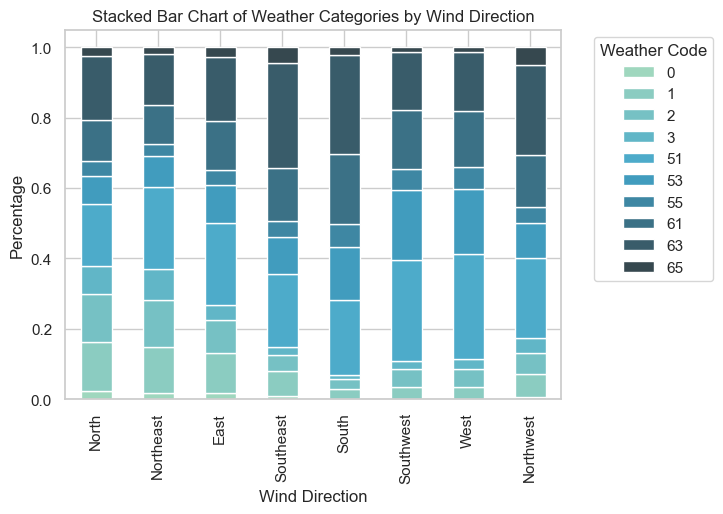

In [32]:
grouped_data = df.groupby('Wind_direction')['weathercode'].value_counts(normalize = True).unstack()

# Define the desired order of wind directions
desired_order = ['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest']

# Reorder the index of the grouped_data DataFrame based on the desired order
grouped_data = grouped_data.reindex(desired_order)

# Plot the reordered data
plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.xlabel('Wind Direction')
plt.title('Stacked Bar Chart of Weather Categories by Wind Direction')

plt.legend(title='Weather Code', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()